In [139]:
# yfinance 라이브러리
# 주식정보 받아올 수 있는 라이브러리
!pip install yfinance

^C


In [ ]:
import yfinance as yf
import pandas as pd 

In [ ]:
yf.download('AAPL', start='2019-01-01') #애플 주식

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,39.632500,39.840000,39.119999,39.435001,38.124847,140014000
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.168350,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.366501,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.833580,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.753822,219111200
...,...,...,...,...,...,...
2022-08-25,168.779999,170.139999,168.350006,170.029999,170.029999,51218200
2022-08-26,170.570007,171.050003,163.559998,163.619995,163.619995,78823500
2022-08-29,161.149994,162.899994,159.820007,161.380005,161.380005,73314000


In [ ]:
yf.download('005930.KS', start='2019-01-01')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,39400.0,39400.0,38550.0,38750.0,34936.316406,7847664
2019-01-03,38300.0,38550.0,37450.0,37600.0,33899.500000,12471493
2019-01-04,37450.0,37600.0,36850.0,37450.0,33764.261719,14108958
2019-01-07,38000.0,38900.0,37800.0,38750.0,34936.316406,12748997
2019-01-08,38000.0,39200.0,37950.0,38100.0,34350.289062,12756554
...,...,...,...,...,...,...
2022-08-26,60300.0,60900.0,59900.0,60000.0,60000.000000,9499995
2022-08-29,58700.0,58900.0,58600.0,58600.0,58600.000000,9841329
2022-08-30,58700.0,59000.0,58300.0,58800.0,58800.000000,9690044


1. 각자 한종목의 데이터를 선택
2. (컬럼명 영문에서 한글로 변경)
3. (open, close, high, low 컬럼의 값들을 소수점 2번째 자리까지 반올림 유지)
4. NaN값이 존재하면 시가로 변경
5. 파생변수 생성 : 등락폭 (종가 - 시가)
6. 파생변수 생성 : 등락율 (등락폭 / 시가 * 100)
7. 시가/ 종가/ 등락폭/ 볼륨 데이터를 시각화하여 표시, subplot 4개의 그래프 생성

In [ ]:
sj = yf.download('005930.KS', start='2019-01-01') # 삼성전자
sj.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,39400.0,39400.0,38550.0,38750.0,34936.320312,7847664
2019-01-03,38300.0,38550.0,37450.0,37600.0,33899.496094,12471493
2019-01-04,37450.0,37600.0,36850.0,37450.0,33764.261719,14108958
2019-01-07,38000.0,38900.0,37800.0,38750.0,34936.320312,12748997
2019-01-08,38000.0,39200.0,37950.0,38100.0,34350.292969,12756554


In [ ]:
#sj = sj[['Open', 'Close', 'High', 'Low']].round(2)
sj.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,39400.0,39400.0,38550.0,38750.0,34936.320312,7847664
2019-01-03,38300.0,38550.0,37450.0,37600.0,33899.496094,12471493
2019-01-04,37450.0,37600.0,36850.0,37450.0,33764.261719,14108958
2019-01-07,38000.0,38900.0,37800.0,38750.0,34936.320312,12748997
2019-01-08,38000.0,39200.0,37950.0,38100.0,34350.292969,12756554


In [ ]:
sj.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
#만약 Open에 결측치가 있다면
#sj["Open"].fillna(sj['Open'].mean())

In [ ]:
sj["등락폭"] = sj['Close'] - sj['Open']
sj.head()

,Open,High,Low,Close,Adj Close,Volume,등락폭
Date,,,,,,,
2019-01-02,39400.0,39400.0,38550.0,38750.0,34936.320312,7847664,-650.0
2019-01-03,38300.0,38550.0,37450.0,37600.0,33899.496094,12471493,-700.0
2019-01-04,37450.0,37600.0,36850.0,37450.0,33764.261719,14108958,0.0
2019-01-07,38000.0,38900.0,37800.0,38750.0,34936.320312,12748997,750.0
2019-01-08,38000.0,39200.0,37950.0,38100.0,34350.292969,12756554,100.0


In [ ]:
sj['등락률'] = sj['등락폭'] / sj['Open'] *100
sj.head()

,Open,High,Low,Close,Adj Close,Volume,등락폭,등락률
Date,,,,,,,,
2019-01-02,39400.0,39400.0,38550.0,38750.0,34936.320312,7847664,-650.0,-1.649746
2019-01-03,38300.0,38550.0,37450.0,37600.0,33899.496094,12471493,-700.0,-1.827676
2019-01-04,37450.0,37600.0,36850.0,37450.0,33764.261719,14108958,0.0,0.000000
2019-01-07,38000.0,38900.0,37800.0,38750.0,34936.320312,12748997,750.0,1.973684
2019-01-08,38000.0,39200.0,37950.0,38100.0,34350.292969,12756554,100.0,0.263158


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#시가/ 종가/ 등락폭/ 볼륨 데이터를 시각화하여 표시, subplot 4개의 그래프 생성

c:\Users\ponbr\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ponbr\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46973 (\N{HANGUL SYLLABLE RAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ponbr\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


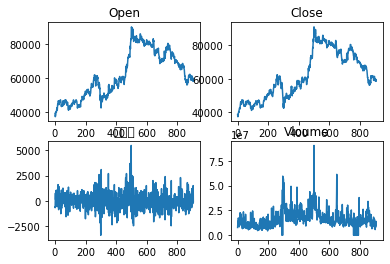

In [ ]:
a = sj['Open'].to_list()
b = sj['Close'].to_list()
c = sj['등락폭'].to_list()
d = sj['Volume'].to_list()

plt.subplot(2, 2, 1)
plt.plot(a)
plt.title("Open") 
plt.subplot(2, 2, 2)
plt.plot(b)
plt.title("Close") 
plt.subplot(2, 2, 3)
plt.plot(c)
plt.title("등락폭") 
plt.subplot(2, 2, 4)
plt.plot(d)
plt.title("Vloume") 
#plt.show()

In [ ]:
## 회사선택
amzn = yf.download('AMZN', start='2019-01-01')
amzn.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,75.540001,76.038002,74.349998,75.098503,75.098503,139090000
2019-01-02,73.260002,77.667999,73.046501,76.956497,76.956497,159662000
2019-01-03,76.000504,76.900002,74.855499,75.014000,75.014000,139512000
2019-01-04,76.500000,79.699997,75.915497,78.769501,78.769501,183652000
2019-01-07,80.115501,81.727997,79.459503,81.475502,81.475502,159864000


In [ ]:
## 소수점 둘째자리까지 유지
amzn[["Open", "Close", "High", "Low"]] = amzn[["Open", "Close", "High", "Low"]].round(2)
amzn.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,75.54,76.04,74.35,75.10,75.098503,139090000
2019-01-02,73.26,77.67,73.05,76.96,76.956497,159662000
2019-01-03,76.00,76.90,74.86,75.01,75.014000,139512000
2019-01-04,76.50,79.70,75.92,78.77,78.769501,183652000
2019-01-07,80.12,81.73,79.46,81.48,81.475502,159864000


In [ ]:
amzn.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
amzn['updown'] = amzn['Close'] - amzn['Open'] 
amzn.head()

,Open,High,Low,Close,Adj Close,Volume,updown
Date,,,,,,,
2018-12-31,75.54,76.04,74.35,75.10,75.098503,139090000,-0.44
2019-01-02,73.26,77.67,73.05,76.96,76.956497,159662000,3.70
2019-01-03,76.00,76.90,74.86,75.01,75.014000,139512000,-0.99
2019-01-04,76.50,79.70,75.92,78.77,78.769501,183652000,2.27
2019-01-07,80.12,81.73,79.46,81.48,81.475502,159864000,1.36


In [ ]:
amzn['updownper'] = amzn['updown'] / amzn['Open'] * 100
amzn.head()

,Open,High,Low,Close,Adj Close,Volume,updown,updownper
Date,,,,,,,,
2018-12-31,75.54,76.04,74.35,75.10,75.098503,139090000,-0.44,-0.582473
2019-01-02,73.26,77.67,73.05,76.96,76.956497,159662000,3.70,5.050505
2019-01-03,76.00,76.90,74.86,75.01,75.014000,139512000,-0.99,-1.302632
2019-01-04,76.50,79.70,75.92,78.77,78.769501,183652000,2.27,2.967320
2019-01-07,80.12,81.73,79.46,81.48,81.475502,159864000,1.36,1.697454


In [ ]:
# 시각화
import matplotlib.pyplot as plt

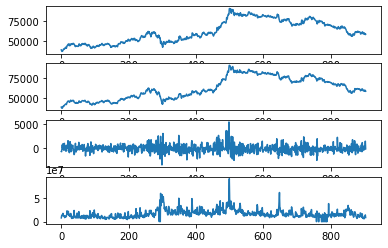

In [ ]:
y1 = amzn['Open'].to_list()
y2 = amzn['Close'].to_list()
y3 = amzn['updownper'].to_list()
y4 = amzn['Volume'].to_list()

plt.subplot(4, 1, 1)
plt.plot(a)
plt.subplot(4, 1, 2)
plt.plot(b)
plt.subplot(4, 1, 3)
plt.plot(c)
plt.subplot(4, 1, 4)
plt.plot(d)
plt.show()

# uriage.csv
1. 파일로드
2. purchase_date 컬럼을 시계열데이터 변경
3. item_name 컬럼의 값들을 다 대문자 변경
4. item_name 컬럼의 값들의 공백을 다 삭제 (좌우, 띄어쓰기 전부 삭제)
5. item_name을 기준으로 오름차순 정렬
6. 인덱스 재지정
7. 결측치의 값을 확인

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
uriage = pd.read_csv("../csv/uriage.csv")
uriage.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상 품 S,NaN,김우찬
2,2019-05-11 19:42,상 품 a,NaN,김유찬
3,2019-02-12 23:40,상품Z,2600.0,김재현
4,2019-04-22 3:09,상품a,NaN,김강현


In [ ]:
uriage["purchase_date"] = pd.to_datetime(uriage["purchase_date"], format = "%Y-%m-%d %H:%M")
uriage.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:00,상품A,100.0,김가온
1,2019-07-13 13:05:00,상 품 S,NaN,김우찬
2,2019-05-11 19:42:00,상 품 a,NaN,김유찬
3,2019-02-12 23:40:00,상품Z,2600.0,김재현
4,2019-04-22 03:09:00,상품a,NaN,김강현


In [ ]:
uriage["item_name"] = uriage["item_name"].str.upper()
uriage.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:00,상품A,100.0,김가온
1,2019-07-13 13:05:00,상 품 S,NaN,김우찬
2,2019-05-11 19:42:00,상 품 A,NaN,김유찬
3,2019-02-12 23:40:00,상품Z,2600.0,김재현
4,2019-04-22 03:09:00,상품A,NaN,김강현


In [ ]:
uriage['item_name'] = uriage['item_name'].replace(" ", "", regex=True)
uriage.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:00,상품A,100.0,김가온
1,2019-07-13 13:05:00,상품S,NaN,김우찬
2,2019-05-11 19:42:00,상품A,NaN,김유찬
3,2019-02-12 23:40:00,상품Z,2600.0,김재현
4,2019-04-22 03:09:00,상품A,NaN,김강현


In [ ]:
uriage.sort_values(["item_name"], inplace=True)
uriage.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:00,상품A,100.0,김가온
1748,2019-05-19 20:22:00,상품A,100.0,김시훈
223,2019-06-25 08:13:00,상품A,100.0,김유진
1742,2019-06-13 16:03:00,상품A,100.0,김건희
1738,2019-02-10 00:28:00,상품A,100.0,김하랑


In [ ]:
uriage.reset_index(drop=True, inplace=True)
uriage.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:00,상품A,100.0,김가온
1,2019-05-19 20:22:00,상품A,100.0,김시훈
2,2019-06-25 08:13:00,상품A,100.0,김유진
3,2019-06-13 16:03:00,상품A,100.0,김건희
4,2019-02-10 00:28:00,상품A,100.0,김하랑


In [ ]:
uriage.isna().sum()

purchase_date      0
item_name          0
item_price       387
customer_name      0
dtype: int64

In [ ]:
uriage['item_price'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2994     True
2995     True
2996    False
2997    False
2998    False
Name: item_price, Length: 2999, dtype: bool

# 해답

In [140]:
import pandas as pd
import numpy as np

In [141]:
uriage = pd.read_csv("../csv/uriage.csv")
uriage.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상 품 S,NaN,김우찬
2,2019-05-11 19:42,상 품 a,NaN,김유찬
3,2019-02-12 23:40,상품Z,2600.0,김재현
4,2019-04-22 3:09,상품a,NaN,김강현


In [142]:
uriage_copy = uriage.copy()

In [143]:
uriage_copy['purchase_date'] = pd.to_datetime(uriage_copy['purchase_date']) #기본형태랑 같기 때문에 format 안적어줘도 됨
uriage_copy.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:00,상품A,100.0,김가온
1,2019-07-13 13:05:00,상 품 S,NaN,김우찬
2,2019-05-11 19:42:00,상 품 a,NaN,김유찬
3,2019-02-12 23:40:00,상품Z,2600.0,김재현
4,2019-04-22 03:09:00,상품a,NaN,김강현


In [144]:
# 대문자로 변환
uriage_copy['item_name'] = uriage_copy['item_name'].str.upper() #시리즈는 문자열이 아니기 때문에 .str을 붙여줘야 한다.
uriage_copy.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:00,상품A,100.0,김가온
1,2019-07-13 13:05:00,상 품 S,NaN,김우찬
2,2019-05-11 19:42:00,상 품 A,NaN,김유찬
3,2019-02-12 23:40:00,상품Z,2600.0,김재현
4,2019-04-22 03:09:00,상품A,NaN,김강현


In [ ]:
# 공백 삭제, 띄어쓰기도 같이 삭제

# case1 lambda
uriage_copy['item_name'] = uriage_copy['item_name'].apply(lambda x : x.replace(" ", ""))


# case2
def change(x):
    return x.replace(" ", "")

uriage_copy['item_name'] = uriage_copy['item_name'].apply(change)


# case3
uriage_copy['item_name'] = uriage_copy['item_name'].str.replace(" ", "")

# 확인
uriage_copy.head()

In [145]:
# case3
uriage_copy['item_name'] = uriage_copy['item_name'].str.replace(" ", "")

# 확인
uriage_copy.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:00,상품A,100.0,김가온
1,2019-07-13 13:05:00,상품S,NaN,김우찬
2,2019-05-11 19:42:00,상품A,NaN,김유찬
3,2019-02-12 23:40:00,상품Z,2600.0,김재현
4,2019-04-22 03:09:00,상품A,NaN,김강현


In [146]:
# 오름차순
uriage_copy.sort_values('item_name', ascending=True, inplace=True)
uriage_copy.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:00,상품A,100.0,김가온
1748,2019-05-19 20:22:00,상품A,100.0,김시훈
223,2019-06-25 08:13:00,상품A,100.0,김유진
1742,2019-06-13 16:03:00,상품A,100.0,김건희
1738,2019-02-10 00:28:00,상품A,100.0,김하랑


In [147]:
# 인덱스 재지정, 기존의 인덱스 삭제
uriage_copy.reset_index(drop=True, inplace=True)
                        #기존인덱스 삭제
uriage_copy.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:00,상품A,100.0,김가온
1,2019-05-19 20:22:00,상품A,100.0,김시훈
2,2019-06-25 08:13:00,상품A,100.0,김유진
3,2019-06-13 16:03:00,상품A,100.0,김건희
4,2019-02-10 00:28:00,상품A,100.0,김하랑


In [148]:
# 결측치 확인
uriage_copy.isna().sum()

purchase_date      0
item_name          0
item_price       387
customer_name      0
dtype: int64

In [166]:
# 결측치 값에 해당하는 item_name들의 item_price의 값으로 치환

flg_null = uriage_copy['item_price'].isna()
flg_null

0       False
1       False
2       False
3       False
4       False
        ...  
2994     True
2995     True
2996    False
2997    False
2998    False
Name: item_price, Length: 2999, dtype: bool

In [167]:
uriage_copy.loc[flg_null] # 전부 나옴

,purchase_date,item_name,item_price,customer_name
18,2019-04-11 02:22:00,상품A,NaN,김선우
22,2019-07-07 21:49:00,상품A,NaN,김은우
32,2019-07-14 03:39:00,상품A,NaN,김시우
38,2019-05-25 12:51:00,상품A,NaN,김재민
44,2019-02-28 04:11:00,상품A,NaN,김서준
...,...,...,...,...
2982,2019-03-30 18:50:00,상품Y,NaN,김하율
2984,2019-07-31 16:58:00,상품Y,NaN,김범준
2988,2019-02-20 05:22:00,상품Y,NaN,김은혁
2994,2019-04-22 00:36:00,상품Y,NaN,김동욱


In [168]:
uriage_copy.loc[flg_null, 'item_name'] #item name 나옴

18      상품A
22      상품A
32      상품A
38      상품A
44      상품A
       ... 
2982    상품Y
2984    상품Y
2988    상품Y
2994    상품Y
2995    상품Y
Name: item_name, Length: 387, dtype: object

In [169]:
uriage_copy.loc[flg_null, 'item_name'].unique()
# 중복데이터 삭제되고 전체 상품 리스트가 나옴

array(['상품A', '상품B', '상품C', '상품D', '상품E', '상품F', '상품G', '상품H', '상품I',
       '상품J', '상품K', '상품L', '상품M', '상품N', '상품O', '상품P', '상품Q', '상품R',
       '상품S', '상품T', '상품U', '상품V', '상품W', '상품X', '상품Y'], dtype=object)

In [170]:
# '~' 연산자 -> 부정 의미 
# ~Fasle = True, ~True = False
uriage_copy.loc[(~flg_null)] #결측치가 아닌 데이터만 추출하겠다.

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:00,상품A,100.0,김가온
1,2019-05-19 20:22:00,상품A,100.0,김시훈
2,2019-06-25 08:13:00,상품A,100.0,김유진
3,2019-06-13 16:03:00,상품A,100.0,김건희
4,2019-02-10 00:28:00,상품A,100.0,김하랑
...,...,...,...,...
2992,2019-05-17 18:15:00,상품Y,2500.0,김민기
2993,2019-05-26 10:26:00,상품Y,2500.0,김재민
2996,2019-01-24 10:27:00,상품Y,2500.0,김범준
2997,2019-05-28 13:45:00,상품Y,2500.0,김수현


In [171]:
uriage_copy.loc[(~flg_null) & (uriage_copy['item_name'] == '상품A'), 'item_price'].max() 
                                                                    #min mean 넣어도 나옴
# 결측치가 아닌 상품A의 item_price의 최대값
# 근데 .max() 빼고 돌려봐도 다 같은 값인 100이 나오기 때문에 뭘 넣든 min mean max 셋 다 상관없음

100.0

In [172]:
name_list = uriage_copy.loc[flg_null, 'item_name'].unique()

In [175]:
for name in list(name_list): #리스트 개수만큼 반복
    price = uriage_copy.loc[(~flg_null) & 
    (uriage_copy['item_name'] == name), 'item_price'].mean() #상품 A일 때 한 번 바뀌고, B일 때 한 번 바뀌고... 
    #이 값을 결측치인 값에 집어넣어주면 된다.
    #결측치가 아닌 값을 찾기 위함
    
    uriage_copy['item_price'].loc[(flg_null) & 
    (uriage_copy['item_name'] == name)] = price #결측치이고, 조회한 값의 name이 같은 값을 price에 넣어주겠다.

C:\Users\ponbr\AppData\Local\Temp\ipykernel_2600\3163477912.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uriage_copy['item_price'].loc[(flg_null) &


In [176]:
uriage_copy.isna().sum()

purchase_date    0
item_name        0
item_price       0
customer_name    0
dtype: int64

In [162]:
uriage_copy["item_price"]

0        100.0
1        100.0
2        100.0
3        100.0
4        100.0
         ...  
2994       NaN
2995       NaN
2996    2500.0
2997    2500.0
2998    2600.0
Name: item_price, Length: 2999, dtype: float64

딕셔너리로 하는 방법

In [191]:
price = uriage_copy.groupby(['item_name']).mean()
price.head()

uriage_dict = uriage_copy.copy()

In [194]:
price_dict = price.to_dict()
price_dict = price_dict["item_price"]
price_dict

{'상품A': 100.0,
 '상품B': 200.0,
 '상품C': 300.0,
 '상품D': 400.0,
 '상품E': 500.0,
 '상품F': 600.0,
 '상품G': 700.0,
 '상품H': 800.0,
 '상품I': 900.0,
 '상품J': 1000.0,
 '상품K': 1100.0,
 '상품L': 1200.0,
 '상품M': 1300.0,
 '상품N': 1400.0,
 '상품O': 1500.0,
 '상품P': 1600.0,
 '상품Q': 1700.0,
 '상품R': 1800.0,
 '상품S': 1900.0,
 '상품T': 2000.0,
 '상품U': 2100.0,
 '상품V': 2200.0,
 '상품W': 2300.0,
 '상품X': 2400.0,
 '상품Y': 2500.0,
 '상품Z': 2600.0}

In [195]:
uriage_dict['item_price'] = uriage_dict['item_price'].fillna(uriage_dict['item_name'].apply(lambda x: price_dict.get(x)))
uriage_dict

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:00,상품A,100.0,김가온
1,2019-05-19 20:22:00,상품A,100.0,김시훈
2,2019-06-25 08:13:00,상품A,100.0,김유진
3,2019-06-13 16:03:00,상품A,100.0,김건희
4,2019-02-10 00:28:00,상품A,100.0,김하랑
...,...,...,...,...
2994,2019-04-22 00:36:00,상품Y,2500.0,김동욱
2995,2019-04-30 14:21:00,상품Y,2500.0,김하준
2996,2019-01-24 10:27:00,상품Y,2500.0,김범준
2997,2019-05-28 13:45:00,상품Y,2500.0,김수현
